In [1]:
import torch
!pip install -q itables
!pip install -q torchviz
from torchviz import make_dot
from torchvision import datasets
from torch import optim
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import Dataset,DataLoader, TensorDataset
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
import requests
import cv2

device = 'cuda' if torch.cuda.is_available() else 'cpu'


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
from torchvision import datasets
import torchvision.transforms as transforms

# Specify the folders for train and test data
train_data_folder = 'data/CIFAR10/train'  # This can be any directory
test_data_folder = 'data/CIFAR10/test'    # This can be any directory

# Define any transformations (e.g., converting images to tensors)
transform = transforms.Compose([
    transforms.ToTensor()  # Convert PIL images to PyTorch tensors
])

# Download and prepare the CIFAR-10 dataset
train_cifar10 = datasets.CIFAR10(train_data_folder, download=True, train=True, transform=transform)
test_cifar10 = datasets.CIFAR10(test_data_folder, download=True, train=False, transform=transform)

print("CIFAR-10 dataset has been downloaded and prepared.")

100%|██████████| 170M/170M [00:05<00:00, 31.1MB/s]


Extracting data/CIFAR10/train/cifar-10-python.tar.gz to data/CIFAR10/train


100%|██████████| 170M/170M [00:05<00:00, 30.3MB/s]


Extracting data/CIFAR10/test/cifar-10-python.tar.gz to data/CIFAR10/test
CIFAR-10 dataset has been downloaded and prepared.


In [3]:
# Access training and testing images and targets (labels)
tr_images = train_cifar10.data  # This will give the images in the form of numpy array
tr_targets = train_cifar10.targets  # This will give the labels (targets) for training data

val_images = test_cifar10.data  # This will give the images for testing
val_targets = test_cifar10.targets  # This will give the labels (targets) for testing

# Check the shape of the data
print(f"Training images shape: {tr_images.shape}")
print(f"Training labels shape: {len(tr_targets)}")
print(f"Validation images shape: {val_images.shape}")
print(f"Validation labels shape: {len(val_targets)}")

Training images shape: (50000, 32, 32, 3)
Training labels shape: 50000
Validation images shape: (10000, 32, 32, 3)
Validation labels shape: 10000


In [4]:
tr_images.shape

(50000, 32, 32, 3)

In [5]:
tr_images[0].shape

(32, 32, 3)

In [6]:
tr_images.shape

(50000, 32, 32, 3)

In [7]:
import torch

tr_targets_tensor = torch.tensor(tr_targets)
unique_targets = tr_targets_tensor.unique()
print(f"Unique targets: {unique_targets}")

Unique targets: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [8]:
cifar10_classes = train_cifar10.classes

print(f"CIFAR-10 classes: {cifar10_classes}")

CIFAR-10 classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [9]:
cifar10_class = {k: v for k, v in zip(set(train_cifar10.targets), train_cifar10.classes)}

# Print the mapping
print(cifar10_class)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


100%|██████████| 170M/170M [00:03<00:00, 43.9MB/s]


Extracting data/CIFAR10/cifar-10-python.tar.gz to data/CIFAR10


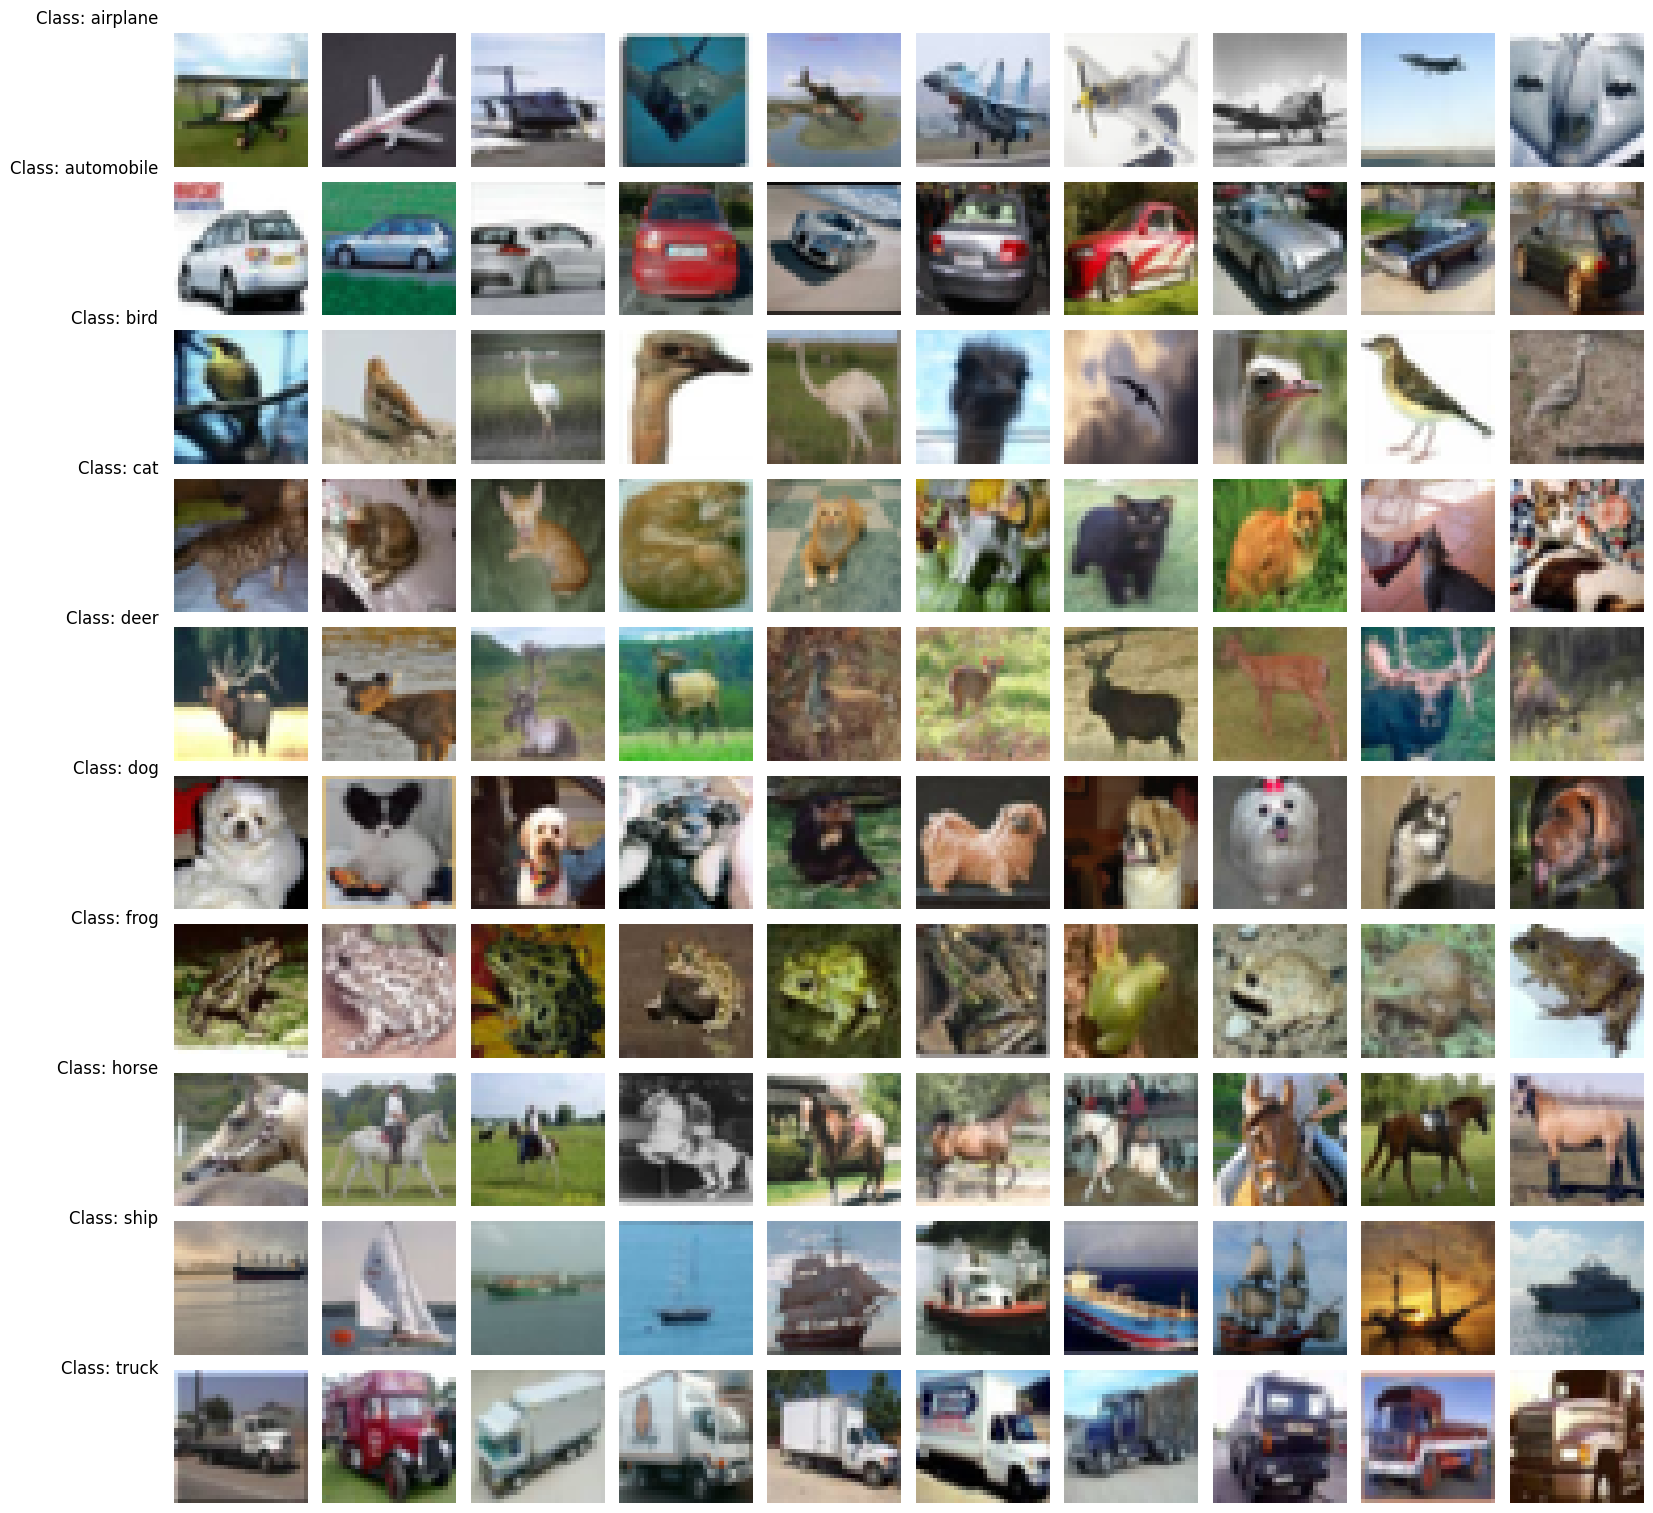

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets

# Load CIFAR-10 dataset
train_cifar10 = datasets.CIFAR10(root='data/CIFAR10', train=True, download=True)
tr_images = train_cifar10.data  # Images as numpy arrays
tr_targets = np.array(train_cifar10.targets)  # Targets as numpy array
cifar10_classes = train_cifar10.classes

# Set number of rows (R) and columns (C) for the plot
R, C = len(np.unique(tr_targets)), 10
fig, ax = plt.subplots(R, C, figsize=(15, 15))

for label_class, plot_row in enumerate(ax):
    # Get indices of images belonging to the current class
    label_x_rows = np.where(tr_targets == label_class)[0]

    # Skip this class if there are no samples
    if len(label_x_rows) == 0:
        continue

    # Add class name as text to the figure
    fig.text(0, 1 - (label_class / R), f"Class: {cifar10_classes[label_class]}",
             ha="right", va="center", fontsize=12)

    for plot_cell in plot_row:
        plot_cell.grid(False)
        plot_cell.axis('off')

        # Randomly select an image from the current class
        ix = np.random.choice(label_x_rows)
        x = tr_images[ix]  # Image
        plot_cell.imshow(x)  # CIFAR-10 images are RGB
plt.tight_layout()
plt.show()


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
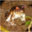

In [11]:
tr_images[0]

In [12]:
tr_images[0].shape

(32, 32, 3)

Epoch 1/50, Train Loss: 1.8441, Validation Loss: 1.5707, Train Accuracy: 0.3393, Validation Accuracy: 0.4347
Epoch 2/50, Train Loss: 1.6578, Validation Loss: 1.5330, Train Accuracy: 0.4089, Validation Accuracy: 0.4510
Epoch 3/50, Train Loss: 1.5812, Validation Loss: 1.4197, Train Accuracy: 0.4363, Validation Accuracy: 0.4992
Epoch 4/50, Train Loss: 1.5343, Validation Loss: 1.4233, Train Accuracy: 0.4507, Validation Accuracy: 0.4865
Epoch 5/50, Train Loss: 1.4922, Validation Loss: 1.4049, Train Accuracy: 0.4672, Validation Accuracy: 0.5029
Epoch 6/50, Train Loss: 1.4490, Validation Loss: 1.3701, Train Accuracy: 0.4846, Validation Accuracy: 0.5129
Epoch 7/50, Train Loss: 1.4218, Validation Loss: 1.2945, Train Accuracy: 0.4950, Validation Accuracy: 0.5422
Epoch 8/50, Train Loss: 1.3955, Validation Loss: 1.2955, Train Accuracy: 0.5033, Validation Accuracy: 0.5367
Epoch 9/50, Train Loss: 1.3705, Validation Loss: 1.3039, Train Accuracy: 0.5134, Validation Accuracy: 0.5284
Epoch 10/50, Train 

<ipython-input-13-c90c4a4a1a8d>:155: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in  plt.gca().get_yticks()])


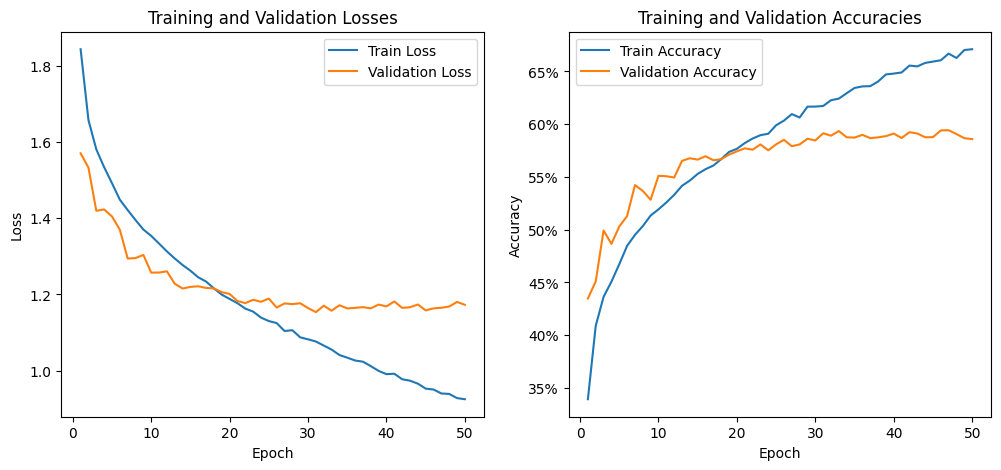

In [13]:
from torch.utils.data import Dataset
import torch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

class CIFAR10Dataset(Dataset):
    def __init__(self, x, y):
        # Normalize the image values to [0, 1] and convert to tensors
        x = torch.tensor(x, dtype=torch.float32) / 255.0  # Normalize
        x = x.permute(0, 3, 1, 2)  # Change shape from (N, 32, 32, 3) to (N, 3, 32, 32) for PyTorch
        self.x, self.y = x, torch.tensor(y, dtype=torch.long)  # Labels as tensors

    def __len__(self):
        # Return the total number of samples
        return len(self.x)

    def __getitem__(self, idx):
        # Return a single sample
        return self.x[idx], self.y[idx]



# Create CIFAR-10 datasets
train_dataset = CIFAR10Dataset(tr_images, tr_targets)
valid_dataset = CIFAR10Dataset(val_images, val_targets)

# Create DataLoaders for training and validation
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=32, shuffle=False)


import torch
import torch.nn as nn

class SimpleCIFAR10DNN(nn.Module):
    def __init__(self):
        super(SimpleCIFAR10DNN, self).__init__()

        # Fully connected layers
        self.fc1 = nn.Linear(32 * 32 * 3, 1000)  # First fully connected layer (input size: 3072)
        self.fc2 = nn.Linear(1000, 1000)         # Second fully connected layer
        self.fc3 = nn.Linear(1000, 1000)         # Third fully connected layer
        self.fc4 = nn.Linear(1000, 10)           # Output layer (10 classes for CIFAR-10)

        # Batch Normalization and Dropout for regularization
        self.batch_norm1 = nn.BatchNorm1d(1000)
        self.batch_norm2 = nn.BatchNorm1d(1000)
        self.batch_norm3 = nn.BatchNorm1d(1000)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)  # Flatten the input

        # First layer: BatchNorm -> Dropout -> ReLU
        x = self.fc1(x)
        x = self.batch_norm1(x)
        x = self.dropout(x)
        x = torch.relu(x)

        # Second layer: BatchNorm -> Dropout -> ReLU
        x = self.fc2(x)
        x = self.batch_norm2(x)
        x = self.dropout(x)
        x = torch.relu(x)

        # Third layer: BatchNorm -> Dropout -> ReLU
        x = self.fc3(x)
        x = self.batch_norm3(x)
        x = self.dropout(x)
        x = torch.relu(x)

        # Output layer
        x = self.fc4(x)
        return x

# Instantiate the model
model = SimpleCIFAR10DNN().to(device)

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Accuracy function
def accuracy(outputs, targets):
    _, predictions = torch.max(outputs, 1)
    correct = (predictions == targets).sum().item()
    return correct / targets.size(0)

# Training loop
def train(model, dataloader, optimizer, criterion):
    model.train()
    total_loss = 0.0
    total_acc = 0.0
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        total_acc += accuracy(outputs, targets)
    return total_loss / len(dataloader), total_acc / len(dataloader)

# Validation loop
def validate(model, dataloader, criterion):
    model.eval()
    total_loss = 0.0
    total_acc = 0.0
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
            total_acc += accuracy(outputs, targets)
    return total_loss / len(dataloader), total_acc / len(dataloader)

# Training settings
n_epochs = 50
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

# Training loop
for epoch in range(n_epochs):
    train_loss, train_acc = train(model, train_dataloader, optimizer, loss_fn)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    test_loss, test_acc = validate(model, valid_dataloader, loss_fn)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {test_loss:.4f}, "
          f"Train Accuracy: {train_acc:.4f}, Validation Accuracy: {test_acc:.4f}")

# Plot losses
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, n_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, n_epochs + 1), test_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()

# Plot accuracies
plt.subplot(1, 2, 2)
plt.plot(range(1, n_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, n_epochs + 1), test_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in  plt.gca().get_yticks()])
plt.legend()

plt.show()